In [142]:
import pandas as pd


In [143]:
from google.colab import files

uploaded = files.upload()


Saving data - Copy.csv to data - Copy (4).csv


In [146]:
import io

# Assuming the uploaded file is named 'data.csv'
df = pd.read_csv(io.BytesIO(uploaded['data - Copy (4).csv']))
print(df.head())




  % Scrap IV per Issue                      1. Apex 1. Bead Reinforcement  \
0                0.10%  A00268 (42mm x 7mm / 0X5CR)                   NaN   
1                0.10%  A00268 (18mm x 7mm / 02D1T)                   NaN   
2                0.10%  A00205 (42mm x 7mm / 04D3D)                   NaN   
3                0.10%  A00205 (42mm x 7mm / 04D3D)                   NaN   
4                0.10%  A00268 (18mm x 7mm / 02D1T)                   NaN   

  1. Belt Ply Assembly - 1. Belt 1. Belt Ply Assembly - 1. Strip Rubber  \
0             MPR090 (245mm; 3°)             B00460 (3mm x mm) PI=17.00   
1             MPS05 (155mm; 24°)             B00460 (3mm x mm) PI=17.00   
2               MPS04 (2mm; 28°)             B00460 (3mm x mm) PI=17.00   
3               MPS04 (2mm; 28°)             B00460 (3mm x mm) PI=17.00   
4              MPS04 (18mm; 28°)             B00460 (3mm x mm) PI=17.00   

      1. Carcass Ply 1. Liner  1. Liner Assembly 1. Liner Assembly - 1. Liner  \
0  14

In [147]:
# Display the names of the columns
print(df.columns)


# Display the number of rows and columns
num_rows, num_columns = df.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Index(['% Scrap IV per Issue', '1. Apex', '1. Bead Reinforcement',
       '1. Belt Ply Assembly - 1. Belt',
       '1. Belt Ply Assembly - 1. Strip Rubber', '1. Carcass Ply', '1. Liner',
       '1. Liner Assembly', '1. Liner Assembly - 1. Liner',
       '1. Liner Assembly - 1. Strip Rubber', '1. Ply Assembly',
       '1. Ply Assembly - 1. Strip Rubber',
       '1. Ply Assembly - 2. Strip Rubber', '1. Ply Assembly - Carcass Ply',
       '1. Sidewall', '1. Sidewall - 1. Flange Cushion',
       '1. Sidewall - Combined Profile', '1. Sidewall - Sidewall Profile',
       '1. Tread Assembly - 1. Tread Base', '1. Tread Assembly - 1. Tread Cap',
       '1. Tread Assembly - 1. Tread Center',
       '1. Tread Assembly - 1. Tread Wing',
       '1. Tread Assembly - 2. Tread Base', '1. Tread Assembly - 2. Tread Cap',
       '1. Tread Assembly - 2. Tread Wing',
       '1. Tread Assembly - Combined Profile',
       '1. Tread Assembly - Tread Cap/Mct-Center',
       '1. Tread Assembly - Tread Cap/Mct-O

Drop the rows which does not have Scrap data for model training.

In [148]:
import pandas as pd

# Assuming df is your original DataFrame

# List of columns to check for missing values
columns_to_check = [
    "% Scrap IV per Issue", "Max. Date", "Min. Date",
    "Cured Tires Count", "Scrap 56 Count"
]

# Drop rows where any of the specified columns have missing values
df_cleaned = df.dropna(subset=columns_to_check)



# Optionally, assign the cleaned DataFrame back to df
df = df_cleaned

print(df.head())
print(f"Number of rows after dropping: {df.shape[0]}")


  % Scrap IV per Issue                      1. Apex 1. Bead Reinforcement  \
0                0.10%  A00268 (42mm x 7mm / 0X5CR)                   NaN   
1                0.10%  A00268 (18mm x 7mm / 02D1T)                   NaN   
2                0.10%  A00205 (42mm x 7mm / 04D3D)                   NaN   
3                0.10%  A00205 (42mm x 7mm / 04D3D)                   NaN   
4                0.10%  A00268 (18mm x 7mm / 02D1T)                   NaN   

  1. Belt Ply Assembly - 1. Belt 1. Belt Ply Assembly - 1. Strip Rubber  \
0             MPR090 (245mm; 3°)             B00460 (3mm x mm) PI=17.00   
1             MPS05 (155mm; 24°)             B00460 (3mm x mm) PI=17.00   
2               MPS04 (2mm; 28°)             B00460 (3mm x mm) PI=17.00   
3               MPS04 (2mm; 28°)             B00460 (3mm x mm) PI=17.00   
4              MPS04 (18mm; 28°)             B00460 (3mm x mm) PI=17.00   

      1. Carcass Ply 1. Liner  1. Liner Assembly 1. Liner Assembly - 1. Liner  \
0  14

The File is first Formated in excel (csv) as per Date, BOM version, Specificaions, and error data. Now preprocess it below for neural neworks.

The first preprocessing is the Mold contour Parameters


In [149]:
# List of column names that are numerical
numerical_columns = [
    'ABD TW45 (mm)', 'ABDc (mm)', 'AD (mm)', 'aTW (mm)', 'BF (mm)', 'DD (mm)',
    'DEB (mm)', 'Delta KS (mm)', 'DP(NDA) (mm)', 'HAS (mm)', 'HAS(90%) (mm)',
    'HF (mm)', 'HK (mm)', 'HMW (inch)', 'HMW (mm)', 'PB (mm)', 'PT(65%) (mm)',
    'PT(90%) (mm)', 'PTm (mm)', 'PTs (mm)', 'R1 (mm)', 'R2 (mm)', 'R3 (mm)',
    'Ratio Delta KS HF', 'Ratio HK Y*', 'Ratio HK/HF', 'Ratio R1/R2',
    'Ratio R1/TW45', 'Ratio R2/TW45', 'Ratio R3/TW45', 'Ratio TW1/TW45',
    'Ratio TW2/TW45', 'SR1 (mm)', 'SR2 (mm)', 'Ters (mm)', 'Ters / NW (%)',
    'TW1 (mm)', 'TW2 (mm)', 'TW45 (mm)', 'Tw65 Tw45', 'Tw90 Tw45'
]

# Extracting the relevant columns from the DataFrame
df_numerical = df[numerical_columns]
# Convert these columns to floats
df_numerical = df_numerical.astype(float)

# No action is required for missing values as per your instructions
# The DataFrame already keeps missing values as NaN by default in pandas
print(df_numerical.isnull().sum())  # Optional: To check how many missing values per column




ABD TW45 (mm)        1
ABDc (mm)            1
AD (mm)              1
aTW (mm)             1
BF (mm)              1
DD (mm)              1
DEB (mm)             1
Delta KS (mm)        1
DP(NDA) (mm)         1
HAS (mm)             1
HAS(90%) (mm)        1
HF (mm)              1
HK (mm)              1
HMW (inch)           1
HMW (mm)             1
PB (mm)              1
PT(65%) (mm)         1
PT(90%) (mm)         1
PTm (mm)             1
PTs (mm)             1
R1 (mm)              1
R2 (mm)              1
R3 (mm)              1
Ratio Delta KS HF    1
Ratio HK Y*          1
Ratio HK/HF          1
Ratio R1/R2          1
Ratio R1/TW45        1
Ratio R2/TW45        1
Ratio R3/TW45        1
Ratio TW1/TW45       1
Ratio TW2/TW45       1
SR1 (mm)             1
SR2 (mm)             1
Ters (mm)            1
Ters / NW (%)        1
TW1 (mm)             1
TW2 (mm)             1
TW45 (mm)            1
Tw65 Tw45            1
Tw90 Tw45            1
dtype: int64


In [150]:
# Fill missing values with 0.00
df_numerical.fillna(0.00, inplace=True)

In [151]:
# No action is required for missing values as per your instructions
# The DataFrame already keeps missing values as NaN by default in pandas
print(df_numerical.isnull().sum())  # Optional: To check how many missing values per column
# Assign the scaled values back to the original DataFrame
df[numerical_columns] = df_numerical

ABD TW45 (mm)        0
ABDc (mm)            0
AD (mm)              0
aTW (mm)             0
BF (mm)              0
DD (mm)              0
DEB (mm)             0
Delta KS (mm)        0
DP(NDA) (mm)         0
HAS (mm)             0
HAS(90%) (mm)        0
HF (mm)              0
HK (mm)              0
HMW (inch)           0
HMW (mm)             0
PB (mm)              0
PT(65%) (mm)         0
PT(90%) (mm)         0
PTm (mm)             0
PTs (mm)             0
R1 (mm)              0
R2 (mm)              0
R3 (mm)              0
Ratio Delta KS HF    0
Ratio HK Y*          0
Ratio HK/HF          0
Ratio R1/R2          0
Ratio R1/TW45        0
Ratio R2/TW45        0
Ratio R3/TW45        0
Ratio TW1/TW45       0
Ratio TW2/TW45       0
SR1 (mm)             0
SR2 (mm)             0
Ters (mm)            0
Ters / NW (%)        0
TW1 (mm)             0
TW2 (mm)             0
TW45 (mm)            0
Tw65 Tw45            0
Tw90 Tw45            0
dtype: int64


In [152]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit the scaler on the data and transform it
# df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_columns)

# # Assign the scaled values back to the original DataFrame
# df[numerical_columns] = df_numerical_scaled

# # Display the first 5 rows of the scaled data
# print(df[numerical_columns].head())


Mold contour is preprocessed. Lets preprocess Specs-BOM fields now.

these below 3 columns are responsible for Scrap 56. So preprocessing them in numeric form. We can change other specs to numeric also, depedning on which respective specs  contribute to specific Scrap codes. for now it is only Scrap 56. so everything else is categorical.

In [153]:
# List of columns to preprocess
columns_to_clean = ['Beltdrum-Diameter', 'Contour: Tw45', 'Shoulder Width (1.Stage)']
#print(df_numerical.isnull().sum())  # Optional: To check how many missing values per column

print(df[columns_to_clean].isnull().sum())  # Optional: To check how many missing values per column
df[columns_to_clean] = df[columns_to_clean].fillna("0.00mm")

# Function to remove 'mm' and convert to float
def remove_mm(value):
    if pd.isnull(value):  # If the value is NaN, return it as is
        return value
    return float(value.replace('mm', '').strip())

# Apply the function to the specified columns
for col in columns_to_clean:
  if df[col].dtype != 'float64':
    df[col] = df[col].apply(remove_mm)

# Display the first 5 rows of the cleaned columns
print(df[columns_to_clean].head())


Beltdrum-Diameter           0
Contour: Tw45               1
Shoulder Width (1.Stage)    0
dtype: int64
   Beltdrum-Diameter  Contour: Tw45  Shoulder Width (1.Stage)
0              702.0          236.5                     400.0
1              557.0          139.3                     312.0
2              691.0          188.0                     382.0
3              691.0          188.0                     382.0
4              612.0          167.7                     368.0


In [154]:
# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit the scaler on the cleaned data and transform it
# df_cleaned_scaled = pd.DataFrame(scaler.fit_transform(df[columns_to_clean]), columns=columns_to_clean)

# df[columns_to_clean]=df_cleaned_scaled
# # Display the first 5 rows of the scaled data
# print(df[columns_to_clean].head())


lets preprocess other columns of BOM fields by applying One hot encoding

In [155]:
# List of columns to apply One-Hot Encoding
categorical_columns = ["1. Apex", "1. Bead Reinforcement", "1. Belt Ply Assembly - 1. Belt", "1. Belt Ply Assembly - 1. Strip Rubber", "1. Carcass Ply", "1. Liner", "1. Liner Assembly", "1. Liner Assembly - 1. Liner", "1. Liner Assembly - 1. Strip Rubber", "1. Ply Assembly", "1. Ply Assembly - 1. Strip Rubber", "1. Ply Assembly - 2. Strip Rubber", "1. Ply Assembly - Carcass Ply", "1. Sidewall", "1. Sidewall - 1. Flange Cushion", "1. Sidewall - Combined Profile", "1. Sidewall - Sidewall Profile", "1. Tread Assembly - 1. Tread Base", "1. Tread Assembly - 1. Tread Cap", "1. Tread Assembly - 1. Tread Center", "1. Tread Assembly - 1. Tread Wing", "1. Tread Assembly - 2. Tread Base", "1. Tread Assembly - 2. Tread Cap", "1. Tread Assembly - 2. Tread Wing", "1. Tread Assembly - Combined Profile", "1. Tread Assembly - Tread Cap/Mct-Center", "1. Tread Assembly - Tread Cap/Mct-Oss", "1. Tread Assembly - Tread Cap/Mct-Ss", "1. Tread Assembly - Tread Ccb", "1. Tread-Belt Assembly", "1. Tread-Belt Assembly - 1. Belt", "1. Tread-Belt Assembly - 1. Wound Cap Ply", "2. Belt Ply Assembly", "2. Belt Ply Assembly - 1. Belt", "2. Belt Ply Assembly - 1. Strip Rubber", "2. Carcass Ply", "Bead", "Carcass", "Carcass Drum", "Drum Profile-No", "Splice Tape Tex,Bic.", "Tsl: Pos22"]

# Step 1: Create Indicator Columns for Missing Values
for col in categorical_columns:
    # Create a binary column that indicates missing values
    df[f'is_missing_{col}'] = df[col].isna().astype(int)

# Check the number of missing values per column
print(df[categorical_columns].isnull().sum())

# Fill missing values with 'empty'
df[categorical_columns] = df[categorical_columns].fillna('empty')


# Apply one-hot encoding using pandas get_dummies method
df_encoded = pd.get_dummies(df, columns=categorical_columns)


# Assign the final DataFrame back to df
df = df_encoded


# Display the first 5 rows of the encoded DataFrame
print(df.head())


1. Apex                                        0
1. Bead Reinforcement                        145
1. Belt Ply Assembly - 1. Belt                 0
1. Belt Ply Assembly - 1. Strip Rubber         0
1. Carcass Ply                                23
1. Liner                                     141
1. Liner Assembly                            164
1. Liner Assembly - 1. Liner                  23
1. Liner Assembly - 1. Strip Rubber           23
1. Ply Assembly                              140
1. Ply Assembly - 1. Strip Rubber            140
1. Ply Assembly - 2. Strip Rubber            160
1. Ply Assembly - Carcass Ply                140
1. Sidewall                                    1
1. Sidewall - 1. Flange Cushion                0
1. Sidewall - Combined Profile                 0
1. Sidewall - Sidewall Profile                 0
1. Tread Assembly - 1. Tread Base              0
1. Tread Assembly - 1. Tread Cap               0
1. Tread Assembly - 1. Tread Center          164
1. Tread Assembly - 

the BOM specs all fields are preprocessed now.

lets preprocess Scrap dates now

In [156]:
# Convert date columns to DateTime objects, handling any inconsistencies
df['Max. Date'] = pd.to_datetime(df['Max. Date'], format='%m/%d/%Y', errors='coerce')
df['Min. Date'] = pd.to_datetime(df['Min. Date'], format='%m/%d/%Y', errors='coerce')

# Check if there are any NaT (Not-a-Time) values after conversion
print("Invalid Max. Date entries:", df['Max. Date'].isna().sum())
print("Invalid Min. Date entries:", df['Min. Date'].isna().sum())

# Calculate the duration between Max. Date and Min. Date
df['Duration (days)'] = (df['Max. Date'] - df['Min. Date']).dt.days

# Drop the date columns if needed
df.drop(columns=['Max. Date', 'Min. Date'], inplace=True)

# Display the duration values to confirm the calculations
print(df['Duration (days)'].tolist())



Invalid Max. Date entries: 0
Invalid Min. Date entries: 0
[25, 0, 1, 0, 30, 175, 0, 1, 0, 23, 0, 0, 0, 0, 60, 0, 0, 0, 38, 336, 5, 255, 0, 39, 148, 1, 294, 109, 0, 0, 0, 21, 4, 5, 430, 50, 94, 131, 10, 36, 0, 22, 4, 255, 2, 76, 0, 223, 224, 0, 26, 0, 280, 81, 16, 544, 1, 79, 1, 3, 4, 1, 0, 387, 347, 0, 46, 1, 95, 2, 0, 1, 49, 238, 84, 59, 11, 0, 187, 39, 1, 4, 0, 3, 4, 2, 61, 12, 63, 318, 0, 32, 53, 9, 385, 52, 124, 23, 2, 131, 1, 2, 77, 0, 207, 0, 0, 256, 77, 2, 524, 18, 13, 17, 39, 80, 4, 19, 32, 1, 98, 57, 573, 0, 138, 20, 291, 23, 11, 0, 35, 5, 647, 27, 538, 0, 267, 388, 5, 71, 595, 0, 65, 133, 148, 559, 53, 106, 408, 3, 363, 56, 51, 635, 100, 234, 2, 0, 515, 82, 0, 0, 19, 245]


In [157]:
# Display the number of rows and columns
num_rows, num_columns = df.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 164
Number of columns: 896


In [158]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Normalize the 'Duration (days)' column
# df['Duration (days)'] = scaler.fit_transform(df[['Duration (days)']])

# # Display the first 5 rows of the normalized 'Duration (days)' column
# print(df['Duration (days)'].head())


lets preprocess scrap count and percentages now data now.

In [159]:
# Step 1: Preprocess the '% Scrap IV per Issue' column
# df['% Scrap IV per Issue'] = df['% Scrap IV per Issue'].str.replace('%', '')  # Remove the '%' symbol
# df['% Scrap IV per Issue'] = df['% Scrap IV per Issue'].str.replace(',', '.')  # Replace comma with dot
# df['% Scrap IV per Issue'] = pd.to_numeric(df['% Scrap IV per Issue'], errors='coerce')  # Convert to numeric

# Step 2: Normalize all three columns using MinMaxScaler

#scrap_columns = ['% Scrap IV per Issue']

#scaler = MinMaxScaler()

#df[scrap_columns] = scaler.fit_transform(df[scrap_columns])

# Convert the columns to float
df['Cured Tires Count'] = df['Cured Tires Count'].astype(float)
df['Scrap 56 Count'] = df['Scrap 56 Count'].astype(float)


df['Cured Tires Count_1'] = df['Cured Tires Count']
#df['Cured Tires Count_2'] = df['Cured Tires Count']
#df['Cured Tires Count_3'] = df['Cured Tires Count']


# Calculate the Scrap 56 % column
df["Scrap 56 %"] = (df["Scrap 56 Count"] * 100) / df["Cured Tires Count"]

# Ensure the new column is numeric
df["Scrap 56 %"] = pd.to_numeric(df["Scrap 56 %"], errors="coerce")

scrap1 = ['Cured Tires Count', 'Scrap 56 Count', 'Scrap 56 %']

# Display the first 5 rows of the preprocessed columns
print(df[scrap1].head())


   Cured Tires Count  Scrap 56 Count  Scrap 56 %
0             3872.0             4.0    0.103306
1              978.0             1.0    0.102249
2             2987.0             3.0    0.100435
3              997.0             1.0    0.100301
4             5073.0             5.0    0.098561


the preprocessing is done. Now Drop the columns which are not required for training

In [160]:
for col in df.columns:
    print(col)


% Scrap IV per Issue
Article 10
Beltdrum-Diameter
CDF Drawing
Contour: Tw45
Creation Date
MML Number
Plant
Shoulder Width (1.Stage)
Variant
ABD TW45 (mm)
ABDc (mm)
AD (mm)
aTW (mm)
BF (mm)
BOM version
Cured Tires Count
DD (mm)
DEB (mm)
Delta KS (mm)
DP(NDA) (mm)
HAS (mm)
HAS(90%) (mm)
HF (mm)
HK (mm)
HMW (inch)
HMW (mm)
PB (mm)
PT(65%) (mm)
PT(90%) (mm)
PTm (mm)
PTs (mm)
R1 (mm)
R2 (mm)
R3 (mm)
Ratio Delta KS HF
Ratio HK Y*
Ratio HK/HF
Ratio R1/R2
Ratio R1/TW45
Ratio R2/TW45
Ratio R3/TW45
Ratio TW1/TW45
Ratio TW2/TW45
Scrap 56 Count
SR1 (mm)
SR2 (mm)
Ters (mm)
Ters / NW (%)
TW1 (mm)
TW2 (mm)
TW45 (mm)
Tw65 Tw45
Tw90 Tw45
is_missing_1. Apex
is_missing_1. Bead Reinforcement
is_missing_1. Belt Ply Assembly - 1. Belt
is_missing_1. Belt Ply Assembly - 1. Strip Rubber
is_missing_1. Carcass Ply
is_missing_1. Liner
is_missing_1. Liner Assembly
is_missing_1. Liner Assembly - 1. Liner
is_missing_1. Liner Assembly - 1. Strip Rubber
is_missing_1. Ply Assembly
is_missing_1. Ply Assembly - 1. Strip 

In [161]:
# List of columns to drop
columns_to_drop = [
    '% Scrap IV per Issue', 'Scrap 56 %',
     'Creation Date', 'CDF Drawing', 'MML Number','Article 10', 'BOM version', 'Variant','Plant'
]

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Display the first 5 rows of the updated DataFrame to ensure columns are dropped
print(df.head())
print(f"Columns after dropping: {df.columns.tolist()}")


   Beltdrum-Diameter  Contour: Tw45  Shoulder Width (1.Stage)  ABD TW45 (mm)  \
0              702.0          236.5                     400.0          735.4   
1              557.0          139.3                     312.0          587.4   
2              691.0          188.0                     382.0          724.3   
3              691.0          188.0                     382.0          724.3   
4              612.0          167.7                     368.0          645.1   

   ABDc (mm)  AD (mm)  aTW (mm)  BF (mm)  Cured Tires Count  DD (mm)  ...  \
0  724.74297    753.0  8.976542    278.0             3872.0    511.5  ...   
1  574.46253    604.0  7.156063    195.0              978.0    378.9  ...   
2  709.61078    742.7  9.492375    253.0             2987.0    486.1  ...   
3  709.61078    742.7  9.492375    253.0              997.0    486.1  ...   
4  630.53335    663.5  8.939112    224.5             5073.0    404.3  ...   

   Tsl: Pos22_PLIES: TREAD: 1 RAYON + 2 STEEL + 2 POLYAM

 Ensure the DataFrame is now fully preprocessed and ready for model training.

Verify Data Types for neural networks


In [162]:


# Loop through each column and print its name and data type
for column in df.columns:
    print(f"Column: {column}, Data Type: {df[column].dtype}")



Column: Beltdrum-Diameter, Data Type: float64
Column: Contour: Tw45, Data Type: float64
Column: Shoulder Width (1.Stage), Data Type: float64
Column: ABD TW45 (mm), Data Type: float64
Column: ABDc (mm), Data Type: float64
Column: AD (mm), Data Type: float64
Column: aTW (mm), Data Type: float64
Column: BF (mm), Data Type: float64
Column: Cured Tires Count, Data Type: float64
Column: DD (mm), Data Type: float64
Column: DEB (mm), Data Type: float64
Column: Delta KS (mm), Data Type: float64
Column: DP(NDA) (mm), Data Type: float64
Column: HAS (mm), Data Type: float64
Column: HAS(90%) (mm), Data Type: float64
Column: HF (mm), Data Type: float64
Column: HK (mm), Data Type: float64
Column: HMW (inch), Data Type: float64
Column: HMW (mm), Data Type: float64
Column: PB (mm), Data Type: float64
Column: PT(65%) (mm), Data Type: float64
Column: PT(90%) (mm), Data Type: float64
Column: PTm (mm), Data Type: float64
Column: PTs (mm), Data Type: float64
Column: R1 (mm), Data Type: float64
Column: R2 (m

Inspect the Distribution of Numerical Features

In [163]:
# Summary statistics of the numerical columns
print("Summary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
       Beltdrum-Diameter  Contour: Tw45  Shoulder Width (1.Stage)  \
count         164.000000     164.000000                164.000000   
mean          655.798780     192.401116                375.121951   
std            39.938784      28.433991                 35.989225   
min           545.000000       0.000000                292.000000   
25%           629.500000     182.300000                352.000000   
50%           661.500000     189.176000                383.000000   
75%           691.000000     202.060000                394.000000   
max           720.000000     281.900000                464.000000   

       ABD TW45 (mm)   ABDc (mm)     AD (mm)    aTW (mm)     BF (mm)  \
count     164.000000  164.000000  164.000000  164.000000  164.000000   
mean      682.810366  670.799799  699.581098    8.181427  243.963415   
std        67.697345   66.178431   68.940782    1.679345   29.275788   
min         0.000000    0.000000    0.000000    

In [164]:
# Check for null values in each column
null_counts = df.isna().sum()

# Loop through the columns and print only those with null values
for column, count in null_counts.items():
    if count > 0:
        print(f"Column '{column}' has {count} null values.")


In [165]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:")
print(df.shape)


Shape of the DataFrame:
(164, 889)


In [166]:
# Check the column names
print("Remaining column names in the DataFrame:")
print(df.columns.tolist())


Remaining column names in the DataFrame:
['Beltdrum-Diameter', 'Contour: Tw45', 'Shoulder Width (1.Stage)', 'ABD TW45 (mm)', 'ABDc (mm)', 'AD (mm)', 'aTW (mm)', 'BF (mm)', 'Cured Tires Count', 'DD (mm)', 'DEB (mm)', 'Delta KS (mm)', 'DP(NDA) (mm)', 'HAS (mm)', 'HAS(90%) (mm)', 'HF (mm)', 'HK (mm)', 'HMW (inch)', 'HMW (mm)', 'PB (mm)', 'PT(65%) (mm)', 'PT(90%) (mm)', 'PTm (mm)', 'PTs (mm)', 'R1 (mm)', 'R2 (mm)', 'R3 (mm)', 'Ratio Delta KS HF', 'Ratio HK Y*', 'Ratio HK/HF', 'Ratio R1/R2', 'Ratio R1/TW45', 'Ratio R2/TW45', 'Ratio R3/TW45', 'Ratio TW1/TW45', 'Ratio TW2/TW45', 'Scrap 56 Count', 'SR1 (mm)', 'SR2 (mm)', 'Ters (mm)', 'Ters / NW (%)', 'TW1 (mm)', 'TW2 (mm)', 'TW45 (mm)', 'Tw65 Tw45', 'Tw90 Tw45', 'is_missing_1. Apex', 'is_missing_1. Bead Reinforcement', 'is_missing_1. Belt Ply Assembly - 1. Belt', 'is_missing_1. Belt Ply Assembly - 1. Strip Rubber', 'is_missing_1. Carcass Ply', 'is_missing_1. Liner', 'is_missing_1. Liner Assembly', 'is_missing_1. Liner Assembly - 1. Liner', 'is

splitting the data in to training, validation and testing.

In [167]:
# Replace 'processed_file.csv' with your desired filename
# df.to_csv('processed_file.csv', index=False)
# from google.colab import files
# files.download('processed_file.csv')



In [168]:
# Define the target variables (output labels)
y = df[['Scrap 56 Count']]

# Define the input features (everything else)
X = df.drop(columns=['Scrap 56 Count'])


Split the Data into Training, Validation, and Testing Sets

In [169]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% temp (to be split further)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temp data into 20% validation and 10% testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42)


In [170]:
# Verify the shapes of the splits
print(f"Training set: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Validation set: X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"Testing set: X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Training set: X_train shape: (114, 888), y_train shape: (114, 1)
Validation set: X_val shape: (45, 888), y_val shape: (45, 1)
Testing set: X_test shape: (5, 888), y_test shape: (5, 1)


build a neural network . and validation as well. this construction is suitable for this model here and for this amount of data we have now. But this neural network should be tested and reconsidered for other models change, having more input features and different types of scraps output.

now testing

In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.regularizers import l2


# # Data Scaling
# scaler_X = MinMaxScaler()
# X_train = scaler_X.fit_transform(X_train)
# X_val = scaler_X.transform(X_val)
# X_test = scaler_X.transform(X_test)

# scaler_y = MinMaxScaler()
# # y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
# # y_val = scaler_y.transform(y_val.reshape(-1, 1)).ravel()
# # y_test = scaler_y.transform(y_test.reshape(-1, 1)).ravel()


# # Convert y values to NumPy arrays and reshape if needed
# y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
# y_val = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
# y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()



# Model Initialization
model = Sequential()
model.add(Dense(40, input_dim=888, activation='relu', kernel_regularizer=l2(0.001)))
#model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.001)))
#model.add(Dropout(0.2))
#model.add(Dense(15, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))  # Output layer with ReLU for positive output

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Train the Model
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=16,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate on Test Set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Predict and Calculate Performance Metrics
y_pred = model.predict(X_test)
# y_pred = scaler_y.inverse_transform(y_pred)
# y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 17371.6777 - mae: 71.3907 - val_loss: 3423.9102 - val_mae: 27.1243 - learning_rate: 0.0010
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9982.9795 - mae: 50.8775 - val_loss: 3300.5708 - val_mae: 37.1666 - learning_rate: 0.0010
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2374.0903 - mae: 31.6583 - val_loss: 18529.3438 - val_mae: 50.2546 - learning_rate: 0.0010
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5659.6240 - mae: 31.9420 - val_loss: 784.9122 - val_mae: 25.3816 - learning_rate: 0.0010
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5828.2559 - mae: 34.9339 - val_loss: 1018.3909 - val_mae: 26.4888 - learning_rate: 0.0010
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5510.3799 - mae: 38.4712 - val_loss: 6661.0312 - val_mae: 34.1072 - learning_rate: 0.0010
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2446.3191 - mae: 27.4408 - val_loss: 669.7420 - val_mae: 14.9813 - lear

In [172]:
mae = mean_absolute_error(y_test, y_pred)


In [173]:
mse = mean_squared_error(y_test, y_pred)


In [174]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)


In [175]:
import pandas as pd
import numpy as np

# Convert y_test and y_pred to NumPy arrays and flatten them
# y_test_flat = y_test.values.flatten()
# y_pred_flat = y_pred.flatten()
y_test_flat = np.array(y_test).ravel()
y_pred_flat = np.array(y_pred).ravel()

# Create a DataFrame to compare the predictions and actual values
comparison_df = pd.DataFrame({
    'Actual Values': y_test_flat,
    'Predicted Values': y_pred_flat
})

# Display the comparison
print(comparison_df)

# Print out the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
#print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


   Actual Values  Predicted Values
0           25.0         61.756618
1          140.0        109.687088
2          110.0        142.574081
3           12.0          1.524143
4            3.0          7.565517
Mean Absolute Error: 22.936997270584108
Mean Squared Error: 692.3159893512606
R-squared: 0.7789257764816284


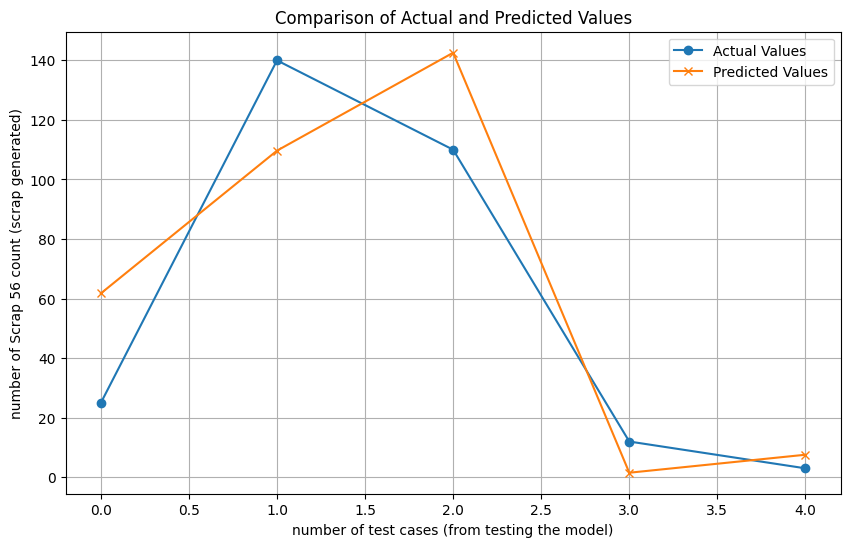

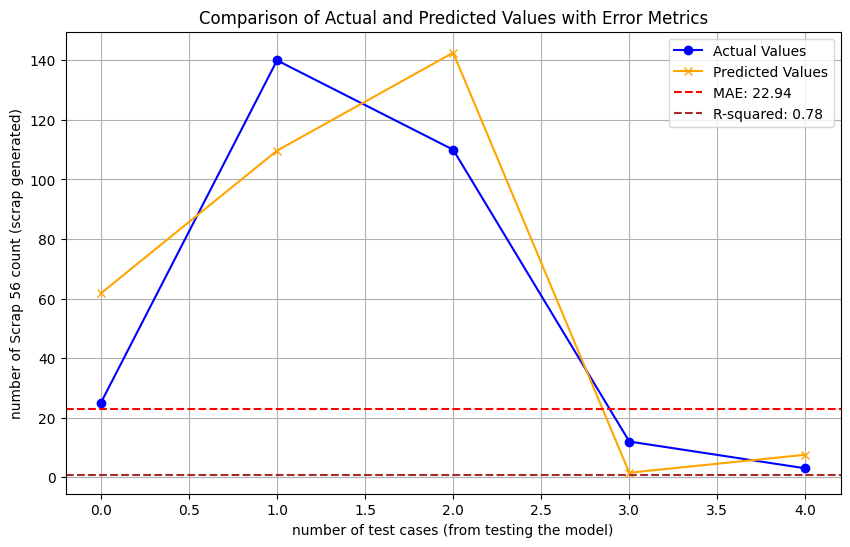

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Line comparison of Actual Values vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual Values'], label='Actual Values', marker='o')
plt.plot(comparison_df['Predicted Values'], label='Predicted Values', marker='x')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('number of test cases (from testing the model)')
plt.ylabel('number of Scrap 56 count (scrap generated)')
plt.legend()
plt.grid(True)
plt.savefig("graphic1.pdf", dpi=600)
plt.show()

# Plot 2: Line comparison including MAE, MSE, RMSE, and R-squared
plt.figure(figsize=(10, 6))

# Plot Actual Values and Predicted Values
plt.plot(comparison_df['Actual Values'], label='Actual Values', marker='o', color='blue')
plt.plot(comparison_df['Predicted Values'], label='Predicted Values', marker='x', color='orange')

# Plot the errors as horizontal lines (Optional)
plt.axhline(y=mae, color='red', linestyle='--', label=f'MAE: {mae:.2f}')
#plt.axhline(y=mse, color='green', linestyle='--', label=f'MSE: {mse:.2f}')
#plt.axhline(y=rmse, color='purple', linestyle='--', label=f'RMSE: {rmse:.2f}')
plt.axhline(y=r2, color='brown', linestyle='--', label=f'R-squared: {r2:.2f}')

plt.title('Comparison of Actual and Predicted Values with Error Metrics')
plt.xlabel('number of test cases (from testing the model)')
plt.ylabel('number of Scrap 56 count (scrap generated)')
plt.legend()
plt.grid(True)
plt.savefig("graphic2.pdf", dpi=600)
plt.show()



In [177]:
from google.colab import files
files.download('graphic1.pdf')  # Downloads the first graphic
files.download('graphic2.pdf')  # Downloads the second graphic (if needed)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>